In [1]:
import keras

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
mnist.load_data()
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print('train_images dimentions:',train_images.ndim)
print('train_images shape :',train_images.shape)
print('train_images type:',train_images.dtype)

train_images dimentions: 3
train_images shape : (60000, 28, 28)
train_images type: uint8


In [4]:
x_train=train_images.reshape(60000,28,28,1)
x_test=test_images.reshape(10000,28,28,1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train/=255
x_test/=255

In [7]:
from keras.utils import np_utils

In [8]:
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [9]:
from keras.models import Model
from keras.layers import Conv2D,MaxPool2D,Input,Flatten,Dense
from keras.activations import relu
from keras.losses import categorical_crossentropy

In [10]:
myInput=Input(shape=(28,28,1))
conv1=Conv2D(16,(3,3),activation='relu',padding='same')(myInput)
pool1=MaxPool2D(pool_size=2)(conv1)
conv2=Conv2D(32,(3,3),activation='relu',padding='same')(pool1)
pool2=MaxPool2D(pool_size=2)(conv2)
flat=Flatten()(pool2)
out_layer = Dense(10,activation='softmax')(flat)

In [11]:
myModel=Model(myInput,out_layer)

In [12]:
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total para

In [14]:
myModel.compile(optimizer=keras.optimizers.Adam(),loss=categorical_crossentropy,metrics=['accuracy'])

In [15]:
network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 1612s 27ms/step - loss: 0.3411 - acc: 0.9068
Epoch 2/2
60000/60000 [==============================] - 1606s 27ms/step - loss: 0.0894 - acc: 0.9736


In [ ]:
#network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=20)

In [16]:
def plot_history1(net_history):
    history=net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    accuracies=history['acc']
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)

    plt.figure()


    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)

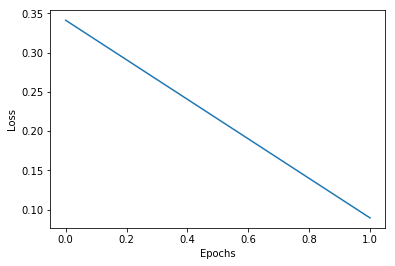

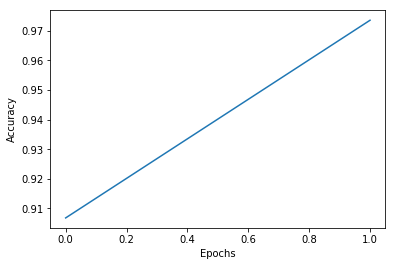

In [18]:
plot_history1(network_history)

In [ ]:
#network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=20,validation_split=0.2)

In [ ]:
def plot_history2(net_history):
    history=net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies=history['acc']
    val_accuracies=history['val_acc']
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss','val_loss'])

    plt.figure()


    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc','val_acc'])

In [ ]:
plot_history2(network_history)

In [19]:
myInput=Input(shape=(28,28,1))
conv1=Conv2D(16,(3,3),activation='relu',padding='same',strides=2)(myInput)
conv2=Conv2D(32,(3,3),activation='relu',padding='same',strides=2)(conv1)
flat=Flatten()(conv2)
out_layer = Dense(10,activation='softmax')(flat)

In [20]:
myModel=Model(myInput,out_layer)

In [21]:
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [22]:
myModel.compile(optimizer=keras.optimizers.Adam(),loss=categorical_crossentropy,metrics=['accuracy'])

In [23]:
network_history=myModel.fit(x_train,y_train,batch_size=128,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 1546s 26ms/step - loss: 0.4216 - acc: 0.8846
Epoch 2/2
60000/60000 [==============================] - 1653s 28ms/step - loss: 0.1356 - acc: 0.9614


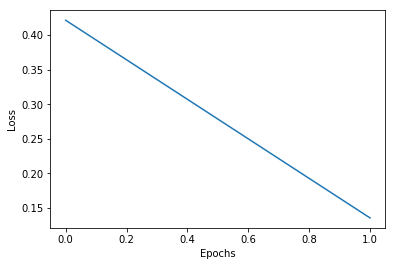

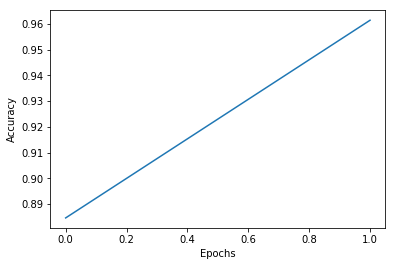

In [24]:
plot_history1(network_history)